In [1]:
# NLP Talents Team Projects Preprocessing notebook 5

# inspiration

import numpy as np 
import nltk
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt  

In [2]:
# data in

data = pd.read_csv('newcleaneddata17082021.csv')
data.tail(10)

Unnamed: 0  Unnamed: 0.1                Date  \
286467      286467        868176  3/20/2021 18:45:05   
286468      286468        868241  3/22/2021 15:07:55   
286469      286469        868268  3/22/2021 21:54:11   
286470      286470        868290  3/23/2021 16:05:01   
286471      286471        868297  3/23/2021 19:11:27   
286472      286472        868309  3/23/2021 21:21:43   
286473      286473        868344  3/24/2021 13:56:49   
286474      286474        868346  3/24/2021 15:03:10   
286475      286475        868347  3/24/2021 15:06:29   
286476      286476        868350  3/24/2021 15:59:14   

                                               Tweet Text  Followers  Follows  \
286467  happy birthday glorious years still shining br...     2408.0   3545.0   
286468                                thank you very much      260.0    171.0   
286469                                               last     1270.0    896.0   
286470  send about your opening time the and the march...       76.0    172.0   
286471                                                NaN      577.0   1871.0   
286472                                          thank you    11378.0   1057.0   
286473                      good morning stansted airport       95.0    958.0   
286474  omg only you knew how much missed you had litt...       95.0    958.0   
286475  spain blood literally dad half spanish family ...       95.0    958.0   
286476        thanks for your quick and informative reply        0.0     31.0   

        Retweets  Favorites Airport_Twitter_Tag Airport_IATA_Codes  \
286467       2.0        0.0        @stn_airport           STN, STN   
286468       0.0        1.0        @stn_airport                STN   
286469       0.0        0.0        @stn_airport                STN   
286470       0.0        0.0        @stn_airport                STN   
286471       0.0        1.0        @stn_airport                STN   
286472       0.0        0.0        @stn_airport                STN   
286473       0.0        0.0        @stn_airport                STN   
286474       0.0        1.0        @stn_airport                STN   
286475       0.0        1.0        @stn_airport                STN   
286476       0.0        0.0        @stn_airport           STN, STN   

                                         Airport_Names  \
286467  London Stansted Airpor, London Stansted Airpor   
286468                          London Stansted Airpor   
286469                          London Stansted Airpor   
286470                          London Stansted Airpor   
286471                          London Stansted Airpor   
286472                          London Stansted Airpor   
286473                          London Stansted Airpor   
286474                          London Stansted Airpor   
286475                          London Stansted Airpor   
286476  London Stansted Airpor, London Stansted Airpor   

                                                   tokens  \
286467  ['happy', 'birthday', 'glorious', 'years', 'st...   
286468                                  ['thank', 'much']   
286469                                           ['last']   
286470  ['send', 'opening', 'time', 'march', 'please',...   
286471                                                 []   
286472                                          ['thank']   
286473         ['good', 'morning', 'stansted', 'airport']   
286474  ['omg', 'knew', 'much', 'missed', 'little', 'h...   
286475  ['spain', 'blood', 'literally', 'dad', 'half',...   
286476        ['thanks', 'quick', 'informative', 'reply']   

                                                no_tokens  
286467  ['happy', 'birthday', 'glorious', 'years', 'st...  
286468                                  ['thank', 'much']  
286469                                           ['last']  
286470  ['send', 'opening', 'time', 'march', 'please',...  
286471                                                 []  
286472                                          ['thank']

In [3]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
import nltk
nltk.download(['punkt','stopwords'])
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Marko\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Marko\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
data.isnull().any().any()

True

In [6]:

data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286477 entries, 0 to 286476
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           286477 non-null  int64  
 1   Unnamed: 0.1         286477 non-null  int64  
 2   Date                 286477 non-null  object 
 3   Tweet Text           252341 non-null  object 
 4   Followers            286477 non-null  float64
 5   Follows              286477 non-null  float64
 6   Retweets             286477 non-null  float64
 7   Favorites            286477 non-null  float64
 8   Airport_Twitter_Tag  286477 non-null  object 
 9   Airport_IATA_Codes   286477 non-null  object 
 10  Airport_Names        286477 non-null  object 
 11  tokens               286477 non-null  object 
 12  no_tokens            286477 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 28.4+ MB


<ipython-input-6-2021d7df9464>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  data.info(null_counts=True)


In [7]:
data_new = data[data['Tweet Text'].notnull()]

In [8]:
data_new.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252341 entries, 0 to 286476
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           252341 non-null  int64  
 1   Unnamed: 0.1         252341 non-null  int64  
 2   Date                 252341 non-null  object 
 3   Tweet Text           252341 non-null  object 
 4   Followers            252341 non-null  float64
 5   Follows              252341 non-null  float64
 6   Retweets             252341 non-null  float64
 7   Favorites            252341 non-null  float64
 8   Airport_Twitter_Tag  252341 non-null  object 
 9   Airport_IATA_Codes   252341 non-null  object 
 10  Airport_Names        252341 non-null  object 
 11  tokens               252341 non-null  object 
 12  no_tokens            252341 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 27.0+ MB


<ipython-input-8-d1003e1db174>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  data_new.info(null_counts=True)


In [9]:
data_new.isnull().any().any()

False

In [10]:
data_new['clean_tweet'] = data_new['Tweet Text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))

<ipython-input-10-2ddd7554fae3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['clean_tweet'] = data_new['Tweet Text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))


In [11]:
data_new.head()

Unnamed: 0  Unnamed: 0.1               Date  \
0           0         15421      4/7/2017 7:52   
1           1         25645    12/3/2018 14:06   
3           3        181260  6/12/2020 0:33:26   
5           5        274014  11/7/2016 6:42:56   
6           6        274016  11/7/2016 7:01:51   

                                          Tweet Text  Followers  Follows  \
0  update flt departed back dublin but flt offloa...    20959.0    240.0   
1  lads come rally the troops for your pals they ...     1433.0    637.0   
3  june british airways resumed daily service fro...    51130.0   3181.0   
5  amazing trip now way home with thx jfk for the...       90.0    318.0   
6  from brazil get hours there and have nice flig...     1610.0    329.0   

   Retweets  Favorites Airport_Twitter_Tag Airport_IATA_Codes  \
0       0.0        0.0      @dublinairport                DUB   
1       0.0        0.0      @dublinairport                DUB   
3       0.0        0.0    @heathrowairport                LHR   
5       0.0        0.0    @heathrowairport                LHR   
6       0.0        0.0    @heathrowairport                LHR   

      Airport_Names                                             tokens  \
0    Dublin Airport  ['update', 'flt', 'departed', 'back', 'dublin'...   
1    Dublin Airport  ['lads', 'come', 'rally', 'troops', 'pals', 'a...   
3  Heathrow Airport  ['june', 'british', 'airways', 'resumed', 'dai...   
5  Heathrow Airport  ['amazing', 'trip', 'way', 'home', 'thx', 'jfk...   
6  Heathrow Airport  ['brazil', 'get', 'hours', 'nice', 'flight', '...   

                                           no_tokens  \
0  ['update', 'flt', 'departed', 'back', 'dublin'...   
1  ['lads', 'come', 'rally', 'troops', 'pals', 'a...   
3  ['june', 'british', 'airways', 'resumed', 'dai...   
5  ['amazing', 'trip', 'way', 'home', 'thx', 'jfk...   
6  ['brazil', 'get', 'hours', 'nice', 'flight', '...   

                                         clean_tweet  
0  update flt departed back dublin flt offloading...  
1                  lads come rally troops pals ahead  
3  june british airways resumed daily service sfo...  
5  amazing trip way home thx jfk awesome service ...  
6  brazil get hours nice flight problem leave air...

In [12]:
data_new['vader_score'] = data_new['clean_tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

<ipython-input-12-07103d23e102>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['vader_score'] = data_new['clean_tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])


In [13]:

data_new.head()

Unnamed: 0  Unnamed: 0.1               Date  \
0           0         15421      4/7/2017 7:52   
1           1         25645    12/3/2018 14:06   
3           3        181260  6/12/2020 0:33:26   
5           5        274014  11/7/2016 6:42:56   
6           6        274016  11/7/2016 7:01:51   

                                          Tweet Text  Followers  Follows  \
0  update flt departed back dublin but flt offloa...    20959.0    240.0   
1  lads come rally the troops for your pals they ...     1433.0    637.0   
3  june british airways resumed daily service fro...    51130.0   3181.0   
5  amazing trip now way home with thx jfk for the...       90.0    318.0   
6  from brazil get hours there and have nice flig...     1610.0    329.0   

   Retweets  Favorites Airport_Twitter_Tag Airport_IATA_Codes  \
0       0.0        0.0      @dublinairport                DUB   
1       0.0        0.0      @dublinairport                DUB   
3       0.0        0.0    @heathrowairport                LHR   
5       0.0        0.0    @heathrowairport                LHR   
6       0.0        0.0    @heathrowairport                LHR   

      Airport_Names                                             tokens  \
0    Dublin Airport  ['update', 'flt', 'departed', 'back', 'dublin'...   
1    Dublin Airport  ['lads', 'come', 'rally', 'troops', 'pals', 'a...   
3  Heathrow Airport  ['june', 'british', 'airways', 'resumed', 'dai...   
5  Heathrow Airport  ['amazing', 'trip', 'way', 'home', 'thx', 'jfk...   
6  Heathrow Airport  ['brazil', 'get', 'hours', 'nice', 'flight', '...   

                                           no_tokens  \
0  ['update', 'flt', 'departed', 'back', 'dublin'...   
1  ['lads', 'come', 'rally', 'troops', 'pals', 'a...   
3  ['june', 'british', 'airways', 'resumed', 'dai...   
5  ['amazing', 'trip', 'way', 'home', 'thx', 'jfk...   
6  ['brazil', 'get', 'hours', 'nice', 'flight', '...   

                                         clean_tweet  vader_score  
0  update flt departed back dublin flt offloading...       0.0000  
1                  lads come rally troops pals ahead       0.0000  
3  june british airways resumed daily service sfo...       0.0000  
5  amazing trip way home thx jfk awesome service ...       0.8860  
6  brazil get hours nice flight problem leave air...      -0.0258

In [14]:
positive_num = len(data_new[data_new['vader_score'] >=0.05])

negative_num = len(data_new[data_new['vader_score']<0.05])

In [15]:
#positive_num,neutral_num, negative_num
positive_num, negative_num

(113987, 138354)

In [16]:
data_new['vader_sentiment_label']= data_new['vader_score'].map(lambda x:int(1) if x>=0.05 else int(0))

<ipython-input-16-597c525b6f38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['vader_sentiment_label']= data_new['vader_score'].map(lambda x:int(1) if x>=0.05 else int(0))


In [17]:
data_new.head()

Unnamed: 0  Unnamed: 0.1               Date  \
0           0         15421      4/7/2017 7:52   
1           1         25645    12/3/2018 14:06   
3           3        181260  6/12/2020 0:33:26   
5           5        274014  11/7/2016 6:42:56   
6           6        274016  11/7/2016 7:01:51   

                                          Tweet Text  Followers  Follows  \
0  update flt departed back dublin but flt offloa...    20959.0    240.0   
1  lads come rally the troops for your pals they ...     1433.0    637.0   
3  june british airways resumed daily service fro...    51130.0   3181.0   
5  amazing trip now way home with thx jfk for the...       90.0    318.0   
6  from brazil get hours there and have nice flig...     1610.0    329.0   

   Retweets  Favorites Airport_Twitter_Tag Airport_IATA_Codes  \
0       0.0        0.0      @dublinairport                DUB   
1       0.0        0.0      @dublinairport                DUB   
3       0.0        0.0    @heathrowairport                LHR   
5       0.0        0.0    @heathrowairport                LHR   
6       0.0        0.0    @heathrowairport                LHR   

      Airport_Names                                             tokens  \
0    Dublin Airport  ['update', 'flt', 'departed', 'back', 'dublin'...   
1    Dublin Airport  ['lads', 'come', 'rally', 'troops', 'pals', 'a...   
3  Heathrow Airport  ['june', 'british', 'airways', 'resumed', 'dai...   
5  Heathrow Airport  ['amazing', 'trip', 'way', 'home', 'thx', 'jfk...   
6  Heathrow Airport  ['brazil', 'get', 'hours', 'nice', 'flight', '...   

                                           no_tokens  \
0  ['update', 'flt', 'departed', 'back', 'dublin'...   
1  ['lads', 'come', 'rally', 'troops', 'pals', 'a...   
3  ['june', 'british', 'airways', 'resumed', 'dai...   
5  ['amazing', 'trip', 'way', 'home', 'thx', 'jfk...   
6  ['brazil', 'get', 'hours', 'nice', 'flight', '...   

                                         clean_tweet  vader_score  \
0  update flt departed back dublin flt offloading...       0.0000   
1                  lads come rally troops pals ahead       0.0000   
3  june british airways resumed daily service sfo...       0.0000   
5  amazing trip way home thx jfk awesome service ...       0.8860   
6  brazil get hours nice flight problem leave air...      -0.0258   

   vader_sentiment_label  
0                      0  
1                      0  
3                      0  
5                      1  
6                      0

In [18]:
#data_new.loc[df_new['vaderReviewScore'] >=0.00,"vaderSentimentLabel"] = 1
#data_new.loc[df_new['vaderReviewScore']<=-0.00,"vaderSentimentLabel"] = 0

In [19]:
data_new.head()

Unnamed: 0  Unnamed: 0.1               Date  \
0           0         15421      4/7/2017 7:52   
1           1         25645    12/3/2018 14:06   
3           3        181260  6/12/2020 0:33:26   
5           5        274014  11/7/2016 6:42:56   
6           6        274016  11/7/2016 7:01:51   

                                          Tweet Text  Followers  Follows  \
0  update flt departed back dublin but flt offloa...    20959.0    240.0   
1  lads come rally the troops for your pals they ...     1433.0    637.0   
3  june british airways resumed daily service fro...    51130.0   3181.0   
5  amazing trip now way home with thx jfk for the...       90.0    318.0   
6  from brazil get hours there and have nice flig...     1610.0    329.0   

   Retweets  Favorites Airport_Twitter_Tag Airport_IATA_Codes  \
0       0.0        0.0      @dublinairport                DUB   
1       0.0        0.0      @dublinairport                DUB   
3       0.0        0.0    @heathrowairport                LHR   
5       0.0        0.0    @heathrowairport                LHR   
6       0.0        0.0    @heathrowairport                LHR   

      Airport_Names                                             tokens  \
0    Dublin Airport  ['update', 'flt', 'departed', 'back', 'dublin'...   
1    Dublin Airport  ['lads', 'come', 'rally', 'troops', 'pals', 'a...   
3  Heathrow Airport  ['june', 'british', 'airways', 'resumed', 'dai...   
5  Heathrow Airport  ['amazing', 'trip', 'way', 'home', 'thx', 'jfk...   
6  Heathrow Airport  ['brazil', 'get', 'hours', 'nice', 'flight', '...   

                                           no_tokens  \
0  ['update', 'flt', 'departed', 'back', 'dublin'...   
1  ['lads', 'come', 'rally', 'troops', 'pals', 'a...   
3  ['june', 'british', 'airways', 'resumed', 'dai...   
5  ['amazing', 'trip', 'way', 'home', 'thx', 'jfk...   
6  ['brazil', 'get', 'hours', 'nice', 'flight', '...   

                                         clean_tweet  vader_score  \
0  update flt departed back dublin flt offloading...       0.0000   
1                  lads come rally troops pals ahead       0.0000   
3  june british airways resumed daily service sfo...       0.0000   
5  amazing trip way home thx jfk awesome service ...       0.8860   
6  brazil get hours nice flight problem leave air...      -0.0258   

   vader_sentiment_label  
0                      0  
1                      0  
3                      0  
5                      1  
6                      0

In [20]:
data_new.drop(['Unnamed: 0.1', 'Followers', 'Follows', 'Retweets', 'Favorites' ], axis = 1, inplace = True)

C:\Users\Marko\anaconda3\envs\Karttunen\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [21]:
data_new = data_new[['Unnamed: 0', 'vader_sentiment_label', 'vader_score', 'clean_tweet', 'Airport_Twitter_Tag', 'no_tokens']]

In [22]:
data_new.head()

Unnamed: 0  vader_sentiment_label  vader_score  \
0           0                      0       0.0000   
1           1                      0       0.0000   
3           3                      0       0.0000   
5           5                      1       0.8860   
6           6                      0      -0.0258   

                                         clean_tweet Airport_Twitter_Tag  \
0  update flt departed back dublin flt offloading...      @dublinairport   
1                  lads come rally troops pals ahead      @dublinairport   
3  june british airways resumed daily service sfo...    @heathrowairport   
5  amazing trip way home thx jfk awesome service ...    @heathrowairport   
6  brazil get hours nice flight problem leave air...    @heathrowairport   

                                           no_tokens  
0  ['update', 'flt', 'departed', 'back', 'dublin'...  
1  ['lads', 'come', 'rally', 'troops', 'pals', 'a...  
3  ['june', 'british', 'airways', 'resumed', 'dai...  
5  ['amazing', 'trip', 'way', 'home', 'thx', 'jfk...  
6  ['brazil', 'get', 'hours', 'nice', 'flight', '...

In [23]:
positive_num = len(data_new[data_new['vader_score'] >=0.05])
neutral_num = len(data_new[(data_new['vader_score'] >-0.05) & (data_new['vader_score']<0.05)])
negative_num = len(data_new[data_new['vader_score']<=-0.05])

In [24]:
positive_num,neutral_num, negative_num

(113987, 97368, 40986)

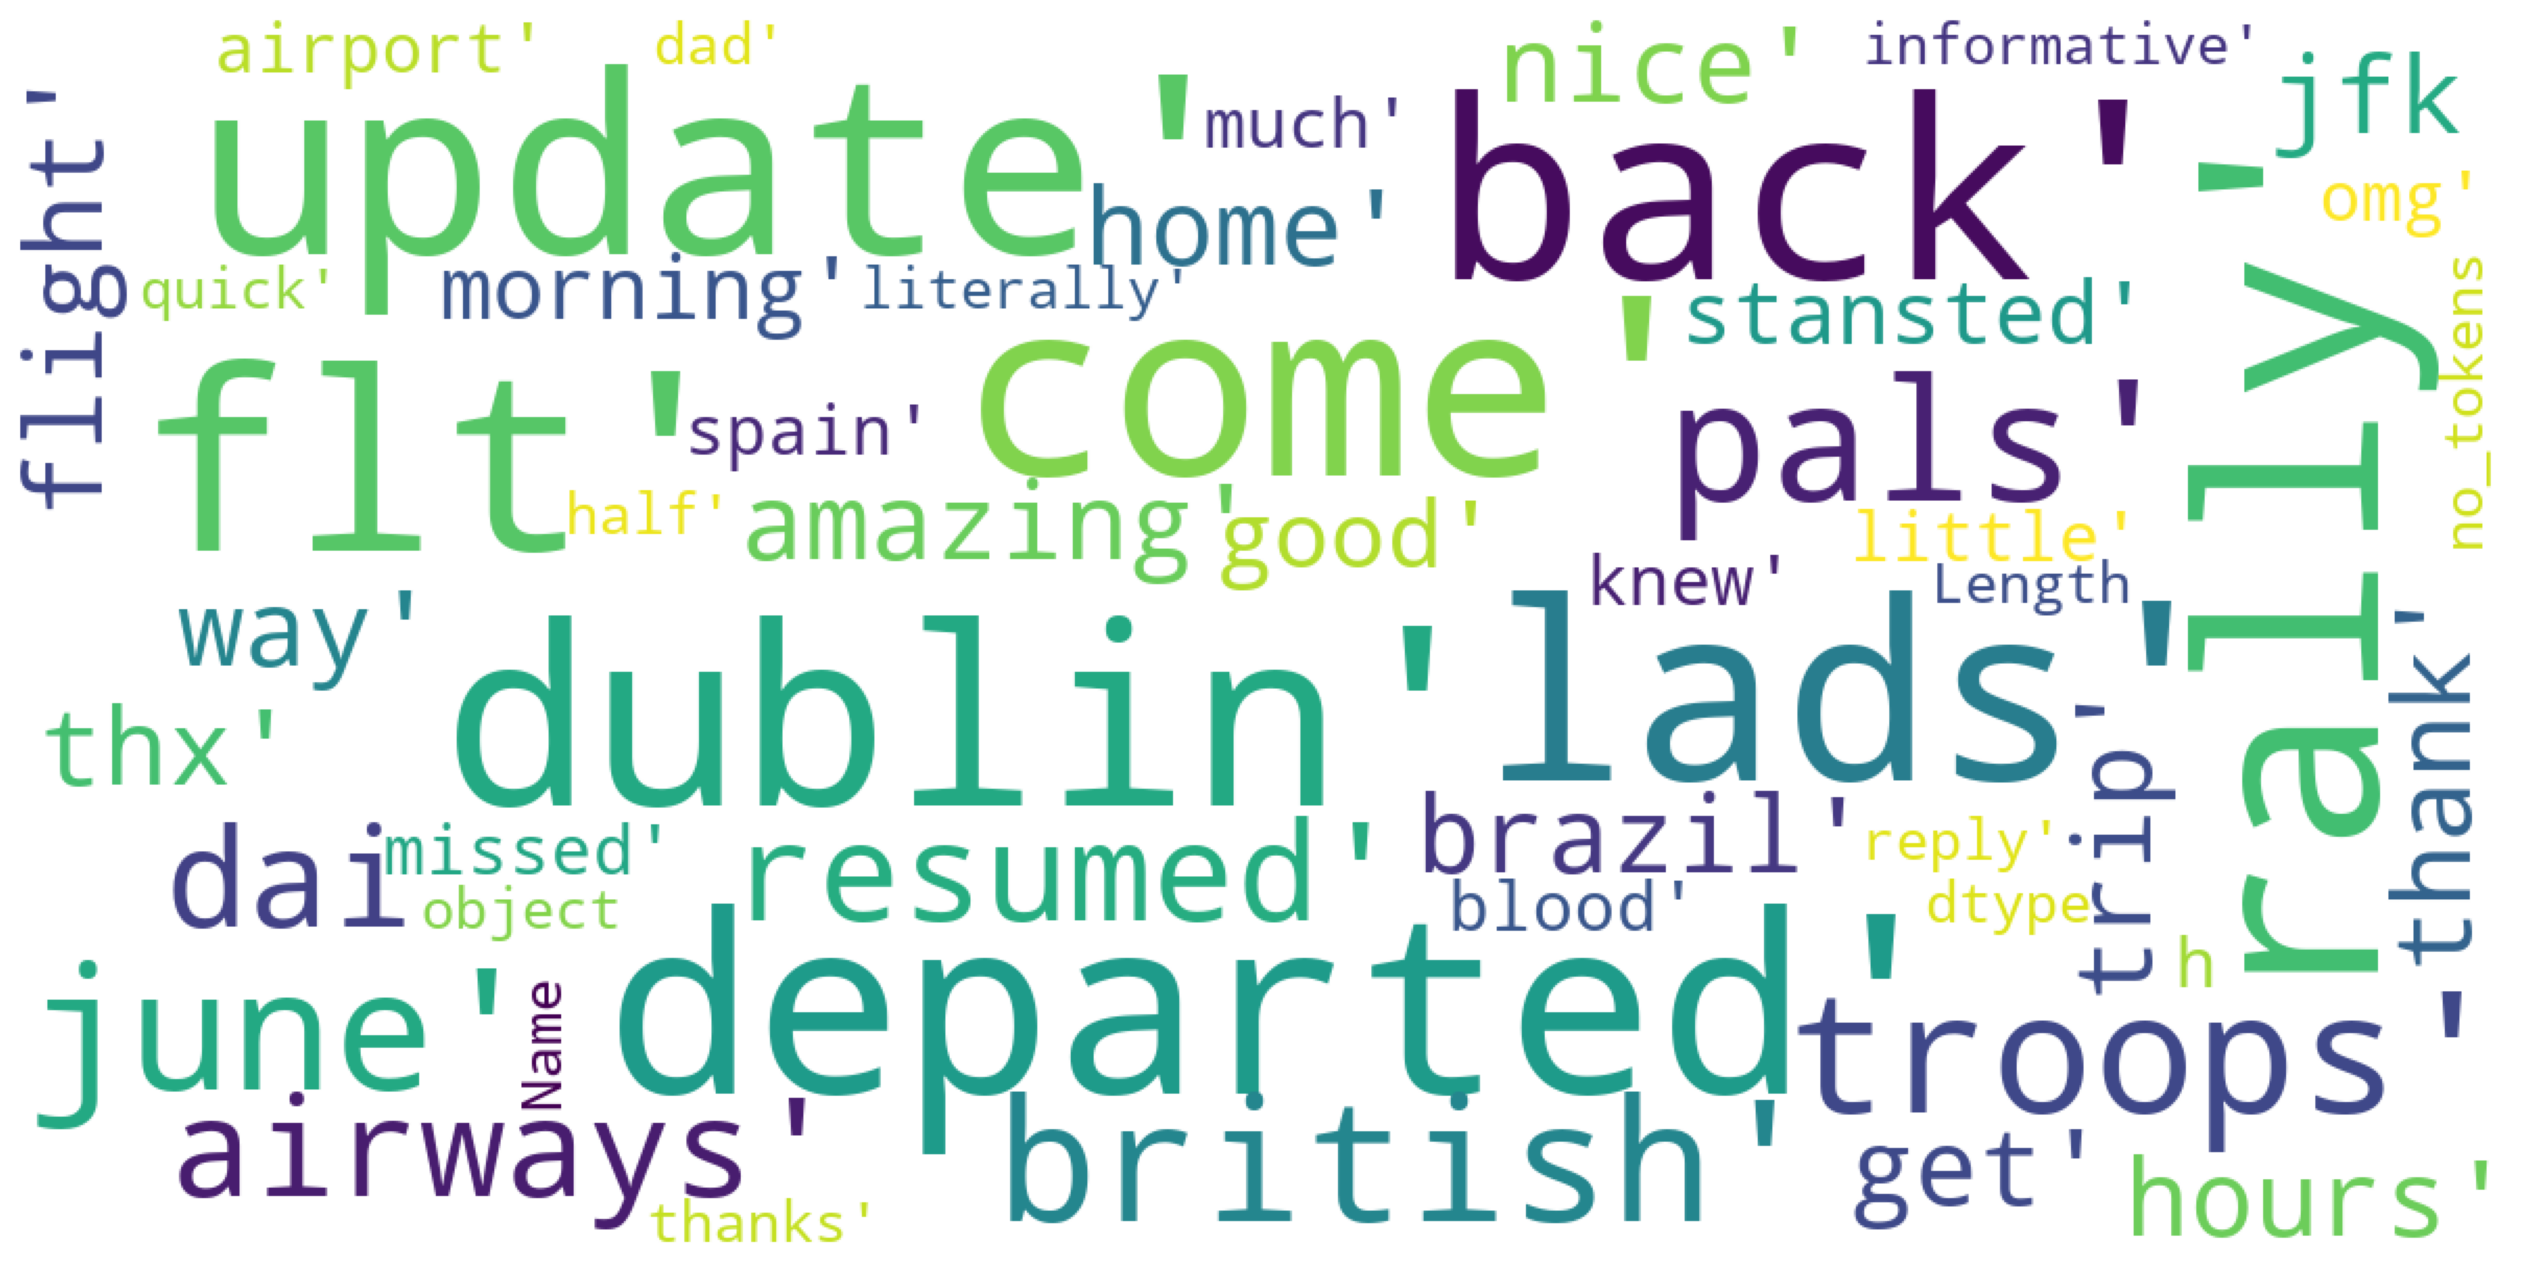

In [25]:

# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(data_new["no_tokens"])

In [26]:
# A new column for positive and negative sentiment 'vader_sentiment_label_string'
data_new['vader_sentiment_label_string'] = data_new['vader_sentiment_label'].replace({1 : 'Positive', 0 : 'Negative'})
data_new

Unnamed: 0  vader_sentiment_label  vader_score  \
0                0                      0       0.0000   
1                1                      0       0.0000   
3                3                      0       0.0000   
5                5                      1       0.8860   
6                6                      0      -0.0258   
...            ...                    ...          ...   
286472      286472                      1       0.3612   
286473      286473                      1       0.4404   
286474      286474                      1       0.1045   
286475      286475                      0       0.0000   
286476      286476                      1       0.4404   

                                              clean_tweet Airport_Twitter_Tag  \
0       update flt departed back dublin flt offloading...      @dublinairport   
1                       lads come rally troops pals ahead      @dublinairport   
3       june british airways resumed daily service sfo...    @heathrowairport   
5       amazing trip way home thx jfk awesome service ...    @heathrowairport   
6       brazil get hours nice flight problem leave air...    @heathrowairport   
...                                                   ...                 ...   
286472                                              thank        @stn_airport   
286473                      good morning stansted airport        @stn_airport   
286474      omg knew much missed little hope glimmer june        @stn_airport   
286475  spain blood literally dad half spanish family ...        @stn_airport   
286476                     thanks quick informative reply        @stn_airport   

                                                no_tokens  \
0       ['update', 'flt', 'departed', 'back', 'dublin'...   
1       ['lads', 'come', 'rally', 'troops', 'pals', 'a...   
3       ['june', 'british', 'airways', 'resumed', 'dai...   
5       ['amazing', 'trip', 'way', 'home', 'thx', 'jfk...   
6       ['brazil', 'get', 'hours', 'nice', 'flight', '...   
...                                                   ...   
286472                                          ['thank']   
286473         ['good', 'morning', 'stansted', 'airport']   
286474  ['omg', 'knew', 'much', 'missed', 'little', 'h...   
286475  ['spain', 'blood', 'literally', 'dad', 'half',...   
286476        ['thanks', 'quick', 'informative', 'reply']   

       vader_sentiment_label_string  
0                          Negative  
1                          Negative  
3                          Negative  
5                          Positive  
6                          Negative  
...                             ...  
286472                     Positive  
286473                     Positive  
286474                     Positive  
286475                     Negative  
286476                     Positive  

[252341 rows x 7 columns]

In [27]:
# add number of characters column
data_new["nb_chars"] = data_new["clean_tweet"].apply(lambda x: len(x))

# add number of words column
data_new["nb_words"] = data_new["clean_tweet"].apply(lambda x: len(x.split(" ")))
data_new

Unnamed: 0  vader_sentiment_label  vader_score  \
0                0                      0       0.0000   
1                1                      0       0.0000   
3                3                      0       0.0000   
5                5                      1       0.8860   
6                6                      0      -0.0258   
...            ...                    ...          ...   
286472      286472                      1       0.3612   
286473      286473                      1       0.4404   
286474      286474                      1       0.1045   
286475      286475                      0       0.0000   
286476      286476                      1       0.4404   

                                              clean_tweet Airport_Twitter_Tag  \
0       update flt departed back dublin flt offloading...      @dublinairport   
1                       lads come rally troops pals ahead      @dublinairport   
3       june british airways resumed daily service sfo...    @heathrowairport   
5       amazing trip way home thx jfk awesome service ...    @heathrowairport   
6       brazil get hours nice flight problem leave air...    @heathrowairport   
...                                                   ...                 ...   
286472                                              thank        @stn_airport   
286473                      good morning stansted airport        @stn_airport   
286474      omg knew much missed little hope glimmer june        @stn_airport   
286475  spain blood literally dad half spanish family ...        @stn_airport   
286476                     thanks quick informative reply        @stn_airport   

                                                no_tokens  \
0       ['update', 'flt', 'departed', 'back', 'dublin'...   
1       ['lads', 'come', 'rally', 'troops', 'pals', 'a...   
3       ['june', 'british', 'airways', 'resumed', 'dai...   
5       ['amazing', 'trip', 'way', 'home', 'thx', 'jfk...   
6       ['brazil', 'get', 'hours', 'nice', 'flight', '...   
...                                                   ...   
286472                                          ['thank']   
286473         ['good', 'morning', 'stansted', 'airport']   
286474  ['omg', 'knew', 'much', 'missed', 'little', 'h...   
286475  ['spain', 'blood', 'literally', 'dad', 'half',...   
286476        ['thanks', 'quick', 'informative', 'reply']   

       vader_sentiment_label_string  nb_chars  nb_words  
0                          Negative        76        11  
1                          Negative        33         6  
3                          Negative        50         8  
5                          Positive        57         9  
6                          Negative        62        10  
...                             ...       ...       ...  
286472                     Positive         5         1  
286473                     Positive        29         4  
286474                     Positive        45         8  
286475                     Negative        54         9  
286476                     Positive        30         4  

[252341 rows x 9 columns]

In [28]:

# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
data_new["sentiments"] = data_new["clean_tweet"].apply(lambda x: sid.polarity_scores(x))
data_new = pd.concat([data_new.drop(['sentiments'], axis=1), data_new['sentiments'].apply(pd.Series)], axis=1)

In [29]:
data_new

Unnamed: 0  vader_sentiment_label  vader_score  \
0                0                      0       0.0000   
1                1                      0       0.0000   
3                3                      0       0.0000   
5                5                      1       0.8860   
6                6                      0      -0.0258   
...            ...                    ...          ...   
286472      286472                      1       0.3612   
286473      286473                      1       0.4404   
286474      286474                      1       0.1045   
286475      286475                      0       0.0000   
286476      286476                      1       0.4404   

                                              clean_tweet Airport_Twitter_Tag  \
0       update flt departed back dublin flt offloading...      @dublinairport   
1                       lads come rally troops pals ahead      @dublinairport   
3       june british airways resumed daily service sfo...    @heathrowairport   
5       amazing trip way home thx jfk awesome service ...    @heathrowairport   
6       brazil get hours nice flight problem leave air...    @heathrowairport   
...                                                   ...                 ...   
286472                                              thank        @stn_airport   
286473                      good morning stansted airport        @stn_airport   
286474      omg knew much missed little hope glimmer june        @stn_airport   
286475  spain blood literally dad half spanish family ...        @stn_airport   
286476                     thanks quick informative reply        @stn_airport   

                                                no_tokens  \
0       ['update', 'flt', 'departed', 'back', 'dublin'...   
1       ['lads', 'come', 'rally', 'troops', 'pals', 'a...   
3       ['june', 'british', 'airways', 'resumed', 'dai...   
5       ['amazing', 'trip', 'way', 'home', 'thx', 'jfk...   
6       ['brazil', 'get', 'hours', 'nice', 'flight', '...   
...                                                   ...   
286472                                          ['thank']   
286473         ['good', 'morning', 'stansted', 'airport']   
286474  ['omg', 'knew', 'much', 'missed', 'little', 'h...   
286475  ['spain', 'blood', 'literally', 'dad', 'half',...   
286476        ['thanks', 'quick', 'informative', 'reply']   

       vader_sentiment_label_string  nb_chars  nb_words    neg    neu    pos  \
0                          Negative        76        11  0.000  1.000  0.000   
1                          Negative        33         6  0.000  1.000  0.000   
3                          Negative        50         8  0.000  1.000  0.000   
5                          Positive        57         9  0.000  0.366  0.634   
6                          Negative        62        10  0.285  0.511  0.204   
...                             ...       ...       ...    ...    ...    ...   
286472                     Positive         5         1  0.000  0.000  1.000   
286473                     Positive        29         4  0.000  0.508  0.492   
286474                     Positive        45         8  0.204  0.555  0.241   
286475                     Negative        54         9  0.000  1.000  0.000   
286476                     Positive        30         4  0.000  0.508  0.492   

        compound  
0         0.0000  
1         0.0000  
3         0.0000  
5         0.8860  
6        -0.0258  
...          ...  
286472    0.3612  
286473    0.4404  
286474    0.1045  
286475    0.0000  
286476    0.4404  

[252341 rows x 13 columns]

In [30]:

# highest positive sentiment reviews (with more than 5 words)
data_new[data_new["nb_words"] >= 5].sort_values("vader_score", ascending = False)[["no_tokens", "vader_score"]].head(25)

no_tokens  vader_score
284701  ['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'ye...       0.9887
2792    ['would', 'love', 'love', 'love', 'love', 'lov...       0.9833
267604  ['happy', 'monday', 'wow', 'exciting', 'lovely...       0.9828
114172  ['would', 'lovely', 'win', 'fab', 'prize', 'li...       0.9823
243880  ['wow', 'amazing', 'prize', 'would', 'love', '...       0.9783
236295  ['good', 'great', 'great', 'day', 'friends', '...       0.9776
111283  ['love', 'dublin', 'love', 'hong', 'kong', 'lo...       0.9776
94248   ['love', 'visit', 'marrakesh', 'amazing', 'cit...       0.9773
276421  ['liked', 'following', 'happily', 'retweeted',...       0.9769
78839   ['delighted', 'winning', 'flights', 'amazing',...       0.9766
69944   ['delighted', 'winning', 'flights', 'amazing',...       0.9766
142745  ['amazing', 'prize', 'would', 'love', 'win', '...       0.9756
114671  ['wow', 'wow', 'wow', 'best', 'place', 'drink'...       0.9756
264565  ['incredibly', 'prize', 'absolutely', 'love', ...       0.9753
143709  ['wow', 'wow', 'wow', 'absolutely', 'love', 'l...       0.9751
266319  ['exciting', 'would', 'love', 'love', 'love', ...       0.9738
46533   ['amazing', 'would', 'absolutely', 'love', 'lo...       0.9720
39110   ['amazing', 'would', 'absolutely', 'love', 'lo...       0.9720
39715   ['amazing', 'would', 'love', 'win', 'husband',...       0.9719
47138   ['amazing', 'would', 'love', 'win', 'husband',...       0.9719
54383   ['love', 'love', 'love', 'love', 'love', 'adve...       0.9719
116946  ['wow', 'amazing', 'prize', 'would', 'dearly',...       0.9719
230658  ['yes', 'thanks', 'take', 'care', 'please', 's...       0.9716
131509  ['many', 'thanks', 'super', 'helpful', 'bus', ...       0.9716
220683  ['yes', 'great', 'job', 'staff', 'pleasant', '...       0.9712

In [31]:

# lowest negative sentiment reviews (with more than 5 words)
data_new[data_new["nb_words"] >= 5].sort_values("neg", ascending = False)[["no_tokens", "vader_score"]].head(25)

no_tokens  vader_score
211520  ['warning', 'warning', 'warning', 'lying', 'th...      -0.9360
241791  ['stop', 'stop', 'stop', 'stop', 'stopping', '...      -0.8885
201108      ['savage', 'stop', 'stop', 'already', 'dead']      -0.8934
240606  ['greedy', 'selfish', 'outrageous', 'rip', 'as...      -0.8885
76871   ['make', 'sick', 'stop', 'racism', 'boycotting...      -0.9423
67976   ['make', 'sick', 'stop', 'racism', 'boycotting...      -0.9423
127341  ['tired', 'rip', 'parking', 'drop', 'charges',...      -0.9246
259793  ['tired', 'stressed', 'furious', 'fuck', 'dela...      -0.9260
113717  ['bad', 'bad', 'bad', 'bad', 'customer', 'serv...      -0.9325
123592  ['fight', 'greed', 'fight', 'lie', 'fight', 'd...      -0.8910
195555  ['scandalous', 'scandalous', 'one', 'dangerous...      -0.9042
201373   ['fake', 'news', 'lady', 'lies', 'lies', 'lies']      -0.8885
175260  ['shame', 'horrendously', 'inconsiderate', 'in...      -0.8885
206144  ['traumatic', 'family', 'crisis', 'suffered', ...      -0.9001
243086  ['fault', 'miserable', 'old', 'prick', 'compla...      -0.8720
56591        ['bloody', 'stupid', 'got', 'staff', 'hell']      -0.8979
124861  ['terrible', 'terrible', 'getting', 'taxi', 'h...      -0.8957
130677  ['fault', 'imposing', 'punitive', 'unfriendly'...      -0.9337
125752  ['chaos', 'parking', 'charges', 'crazy', 'miss...      -0.8555
180878  ['sorry', 'annoy', 'whit', 'stupid', 'question...      -0.8519
263502      ['awful', 'awful', 'airport', 'worst', 'far']      -0.8779
148573  ['fault', 'someone', 'imbecile', 'fault', 'sor...      -0.8360
230472  ['shame', 'dreadful', 'airline', 'bankrupt', '...      -0.8625
37487   ['inconvenience', 'lack', 'contact', 'loss', '...      -0.8225
106789   ['seriously', 'one', 'hell', 'stressful', 'job']      -0.8625

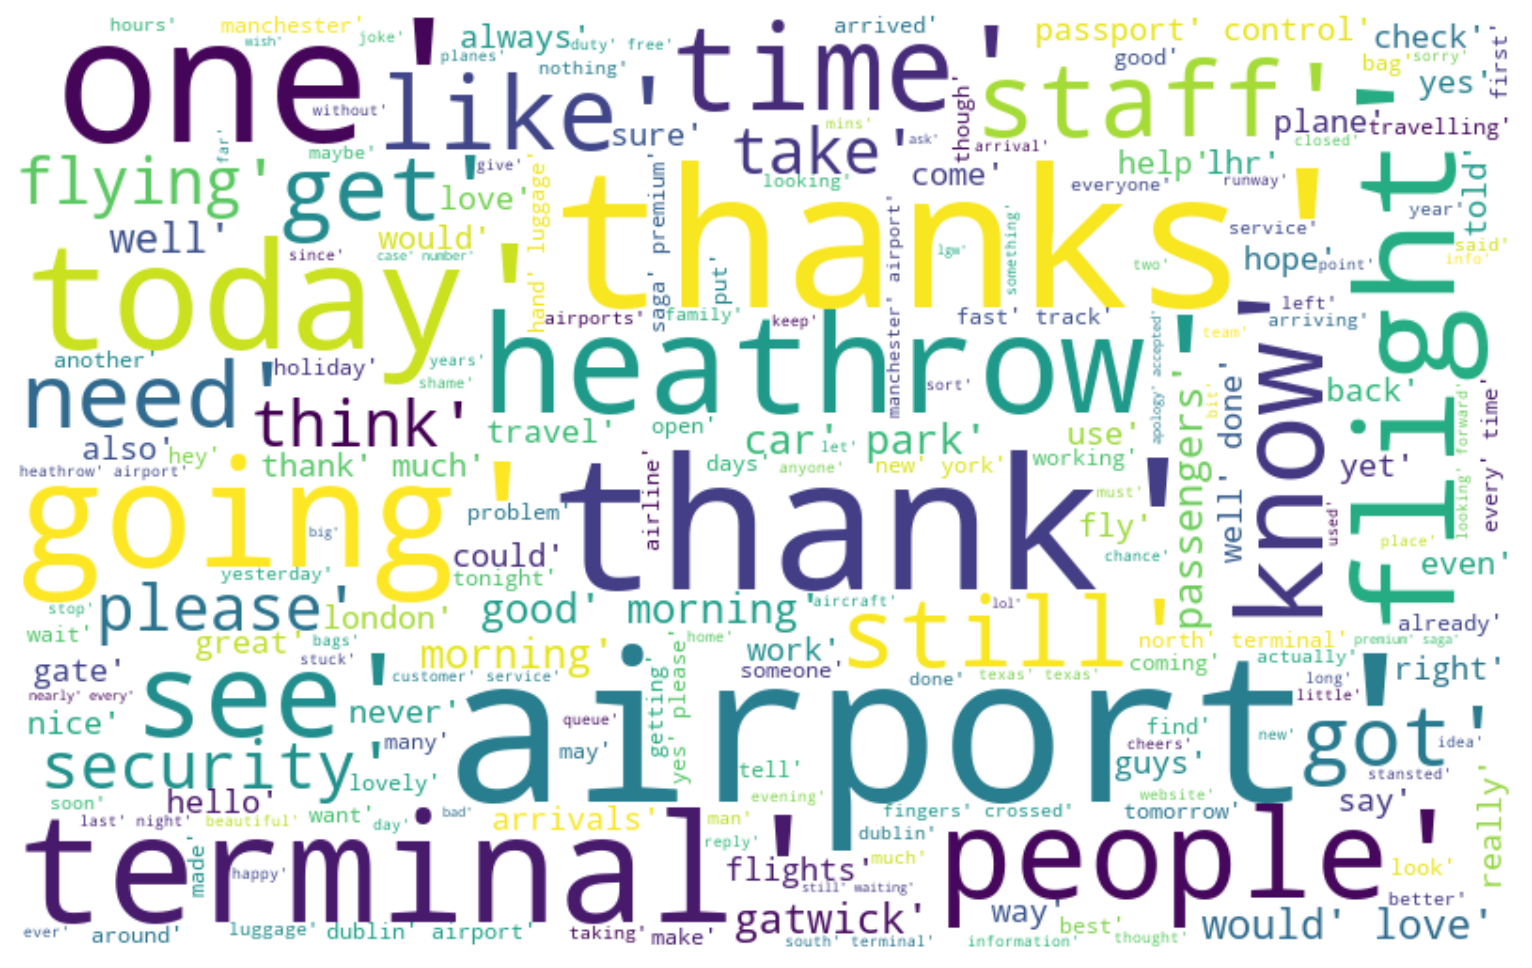

In [36]:
all_words = ' '.join([text for text in data_new['no_tokens']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, background_color='white', random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

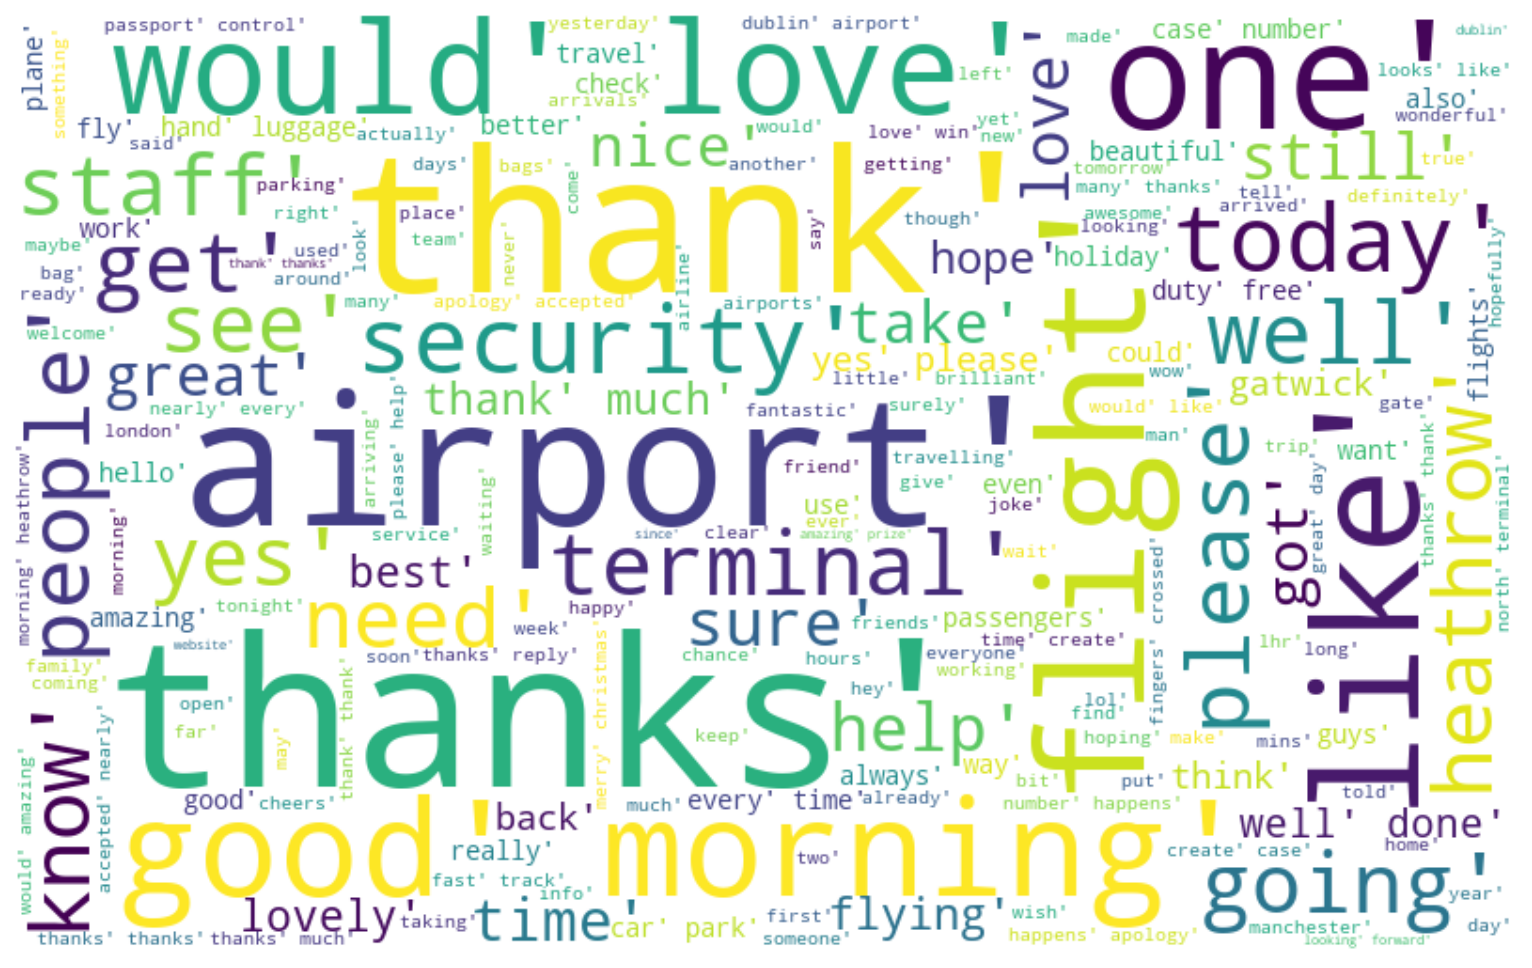

In [37]:

normal_words =' '.join([text for text in data_new['no_tokens'][data_new['vader_sentiment_label'] == 1]])

wordcloud = WordCloud(width=800, height=500, background_color='white', random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

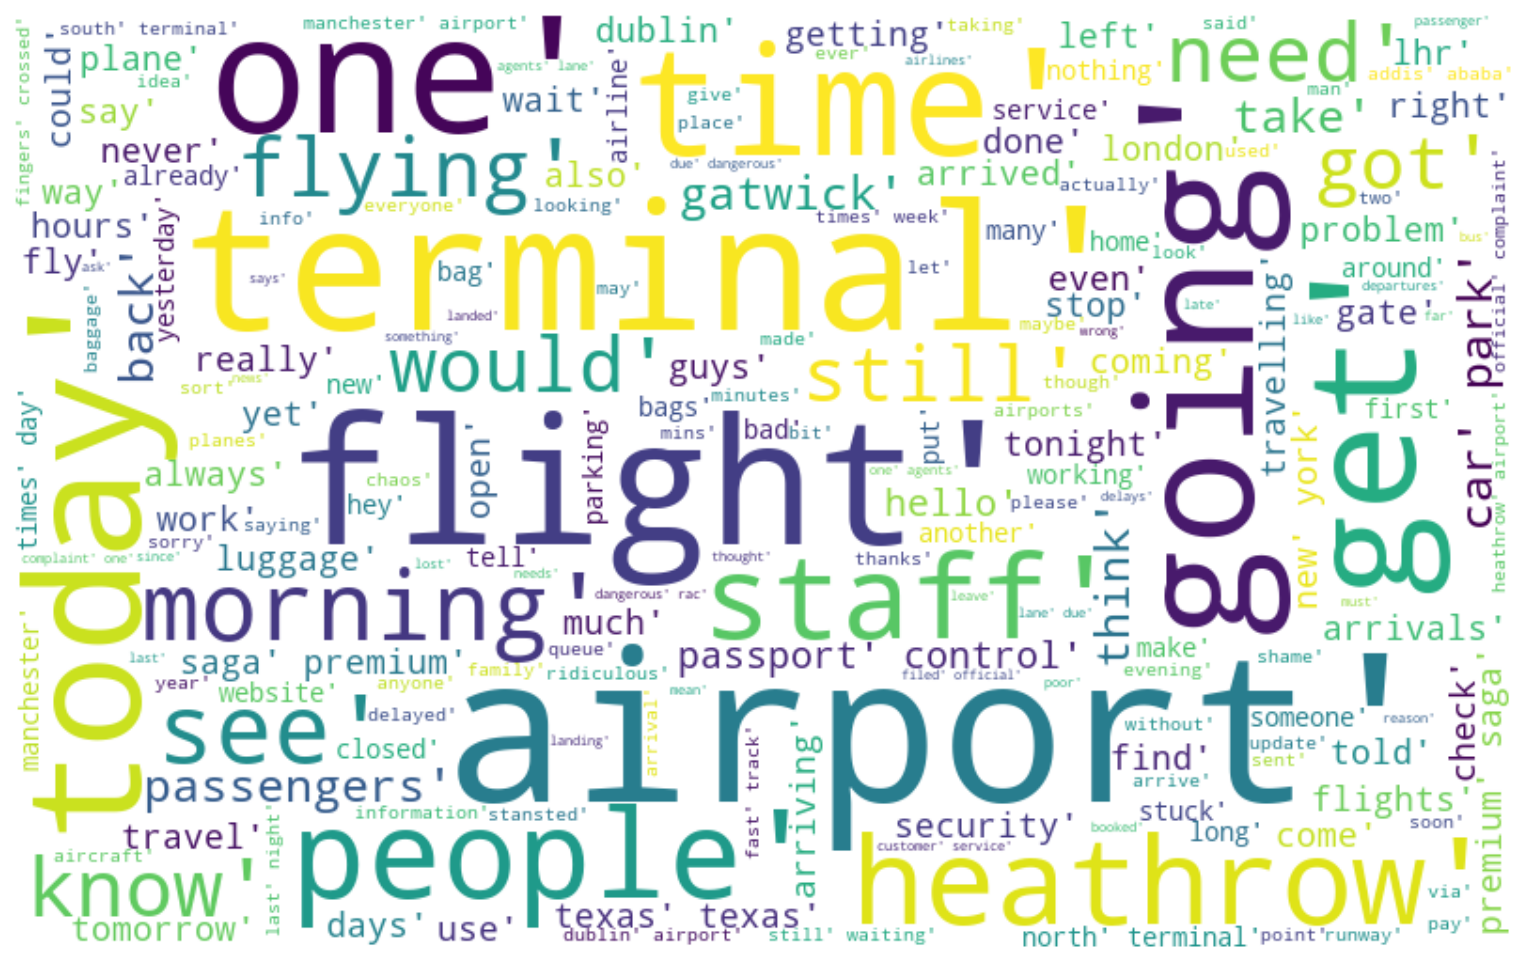

In [39]:

normal_words =' '.join([text for text in data_new['no_tokens'][data_new['vader_sentiment_label'] == 0]])

wordcloud = WordCloud(width=800, background_color='white', height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()